In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# jupyter notebook 내에 figure를 보여주기
%matplotlib inline 

# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

## Q1. 전국 시도별 약국수를 구해주세요!

- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요.
- 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다.
- 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.

In [3]:
df[df['상권업종소분류명'] == '약국']['시도명'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

## Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

In [4]:
# 병원, 약국, 동물병원의 시도별 비율을 value_count 로 구한 후 data frame으로 만들어주기
animal_hos_df = df[df['상권업종소분류명']=='동물병원']['시도명'].value_counts().reset_index()
hospital_df = df[df['상권업종중분류명'] == '병원']['시도명'].value_counts().reset_index()
pharmacy_df = df[df['상권업종소분류명'] == '약국']['시도명'].value_counts().reset_index()
# column 이름을 보기 좋게 변경하고 index를 시도명으로 일치시키기
animal_hos_df.columns = ['시도명', '동물병원']
animal_hos_df.set_index('시도명',inplace=True)
hospital_df.columns = ['시도명', '병원']
hospital_df.set_index('시도명',inplace=True)
pharmacy_df.columns = ['시도명', '약국']
pharmacy_df.set_index('시도명',inplace=True)
# 세 개의 DataFrame을 병합시키기
total_df = animal_hos_df.join(hospital_df)
total_df = total_df.join(pharmacy_df)
total_df.head()

,동물병원,병원,약국
시도명,,,
경기도,992,14101,4510
서울특별시,557,13406,3579
인천광역시,193,3159,1002
경상북도,165,2603,915
경상남도,161,3218,1017


In [5]:
# 각 column 의 시도별 지점수를 최대값으로 나눠주기
target_col = ['동물병원','병원','약국']
weight_col = total_df[target_col].max()
total_rate_df = total_df / weight_col
total_rate_df.head()

,동물병원,병원,약국
시도명,,,
경기도,1.000000,1.000000,1.000000
서울특별시,0.561492,0.950713,0.793570
인천광역시,0.194556,0.224027,0.222173
경상북도,0.166331,0.184597,0.202882
경상남도,0.162298,0.228211,0.225499


In [6]:
weight_col

동물병원      992
병원      14101
약국       4510
dtype: int64

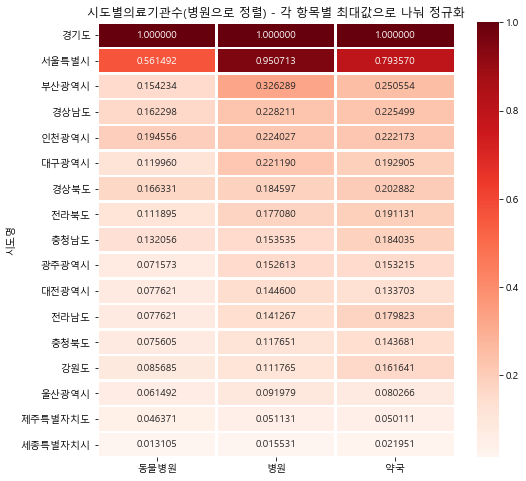

In [7]:
# 몇 가지 옵션으로 더 내용을 확인하기 편하도록 수정하기
# 전체 figure 의 사이즈를 조정
plt.figure(figsize = (8,8))
sns.heatmap(total_rate_df.sort_values(by='병원', ascending=False), annot=True, fmt='f', linewidths=1.5, cmap='Reds')
plt.title('시도별의료기관수(병원으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()

## Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

In [8]:
seoul_hos_df = df[(df['상권업종중분류명']=='병원') & (df['시도명']=='서울특별시')]
seoul_total_hos = seoul_hos_df.value_counts('시군구명')
beauty_hos_df = seoul_hos_df[seoul_hos_df['상권업종소분류명'].str.contains('피부|성형')].value_counts('시군구명').reset_index()
beauty_hos_df.set_index('시군구명',inplace=True)
beauty_hos_df.columns = ['피부|성형']
beauty_hos_df = beauty_hos_df.div(seoul_total_hos, axis='index')
beauty_hos_df.round(2).sort_values(by='피부|성형',ascending=False)

,피부|성형
시군구명,
강남구,0.24
서초구,0.17
마포구,0.09
영등포구,0.08
서대문구,0.08
강서구,0.07
강동구,0.07
중구,0.07
양천구,0.07


## Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [9]:
import folium

In [10]:
old_hos_df = df[df['상권업종소분류명']=='노인/치매병원']
map = folium.Map(location=[old_hos_df['위도'].mean(),old_hos_df['경도'].mean()], zoom_start=7)

In [11]:
for n in old_hos_df.index :
    name = old_hos_df.loc[n,"상호명"]
    address = old_hos_df.loc[n,"도로명주소"]
    popup = f"{name}-{address}"
    location = [old_hos_df.loc[n,"위도"],old_hos_df.loc[n,"경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map